In [1]:
import scipy.io
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cv2
from PIL import Image

# Load samples into a list

Samples are loaded as numpy 4D numpy array, and saved in sample list

In [ ]:
# dirs with control and Diabetes martices 
raw_data_dir_ctrl = '~/Placenta_MRI_2021/data/raw_data_dropbox/4channels/Control/'
raw_data_dir_diabetes = '~/Placenta_MRI_2021/data/raw_data_dropbox/4channels/Gestational_Diabetes/'


def load_matrices(raw_dir):
    """function that read raw .mat files from directory and exctract pixel matrices and file names.
    returns list of numpy matrices and list of file names"""
    raw_data_dir_fnames = os.listdir(raw_dir)
    #raw_data_dir_fnames.remove('mmc_0188_image_matrix.mat')  # we didn't use this sample until now
    print("found {} .mat files in {}".format(len(raw_data_dir_fnames), raw_dir))
    all_samples_temp = []
    all_samples_names_temp = []
    for raw_fname in raw_data_dir_fnames:
        print(raw_fname)
        mat = scipy.io.loadmat(raw_dir + raw_fname)
        try:
            mat_voxels = mat['plac_matrix']
        except KeyError:
            mat_voxels = mat['map_mat']
        all_samples_temp.append(mat_voxels)
        all_samples_names_temp.append(raw_fname.replace('_image_matrix','').replace('.mat',''))
    return all_samples_temp, all_samples_names_temp
        
    
# load control samples
all_samples_ctrl, all_samples_names_ctrl = load_matrices(raw_data_dir_ctrl)

# load Diaebetes samples
all_samples_GD, all_samples_names_GD = load_matrices(raw_data_dir_diabetes)

# merge data to one list
all_samples = all_samples_ctrl + all_samples_GD
all_samples_names = all_samples_names_ctrl + all_samples_names_GD

### Make 3d digital biopsy from raw data 

digital biopsy is center crop of 93 pixels in each axis from the center. This way we capture the placenta and exlude the tube and noise.

In [3]:
def clear_NA_and_get_stats(np_mat):
    """convert missing values to 0, and print satistics"""
    # count nan's in file
    print("number of NaNs in matrix:",np.count_nonzero(np.isnan(np_mat)))

    #convert nans to 0
    print("Converting NaNs to 0")
    where_are_NaNs = np.isnan(np_mat)
    np_mat[where_are_NaNs] = 0

    print()
    print("shape of matrix:",np_mat.shape)
    print("min val:", np.nanmin(np_mat))
    print("max val:", np.nanmax(np_mat))
    print("mean val:",np.nanmean(np_mat))
    print('bit value:', np.log2(len(np.unique(mat_to_analyze[:,:,:,3]))))
    


0
Analyze matrix: emc_0117
shape before cropping: (360, 280, 280, 4)
new shape is: (186, 186, 186, 4)


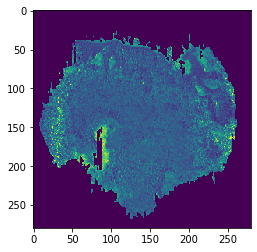

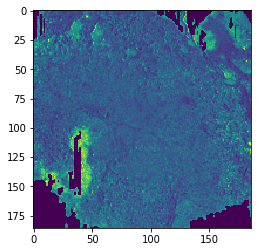

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.47157586669999674
bit value: 22.360786281342165


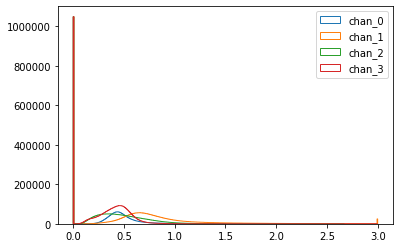

1
Analyze matrix: emc_0201
shape before cropping: (360, 280, 280, 4)
new shape is: (186, 186, 186, 4)


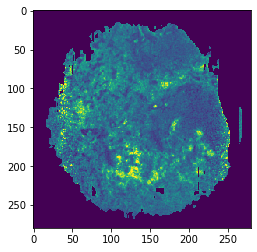

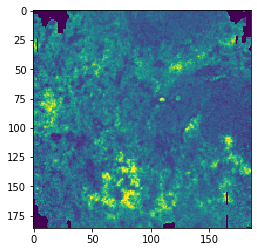

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.6198005160222122
bit value: 22.490539743668364


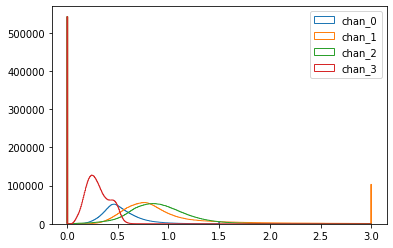

2
Analyze matrix: mmc_0122
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


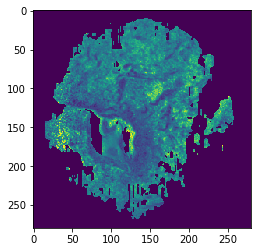

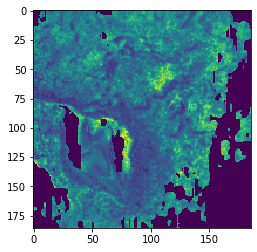

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.5265830087674965
bit value: 22.240525250181033


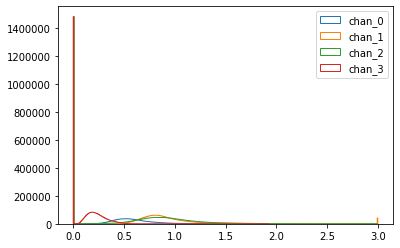

3
Analyze matrix: hmo_0252
shape before cropping: (320, 280, 280, 4)
new shape is: (186, 186, 186, 4)


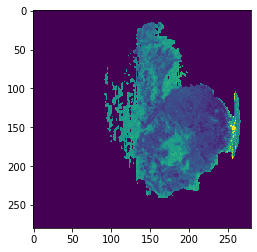

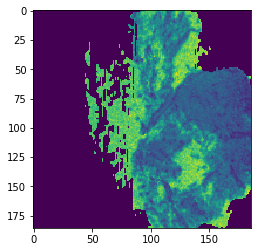

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.24751657494341167
bit value: 21.46963684938232


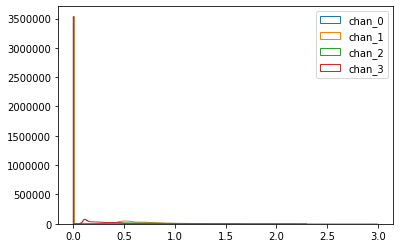

4
Analyze matrix: mmc_0178
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


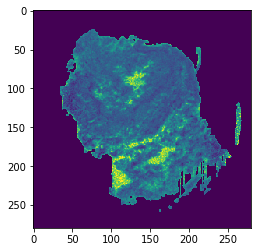

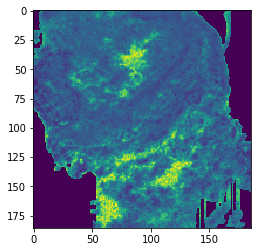

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.4914921546867618
bit value: 22.220325478894953


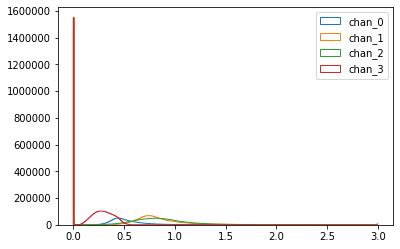

5
Analyze matrix: hymc_0085
shape before cropping: (420, 280, 280, 4)
new shape is: (186, 186, 186, 4)


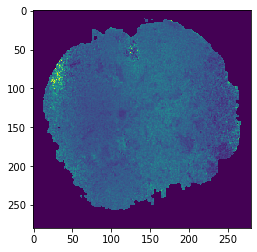

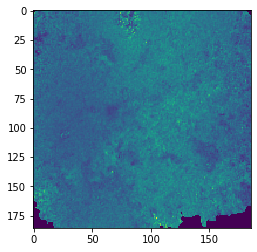

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.5763454862902747
bit value: 22.512770597710276


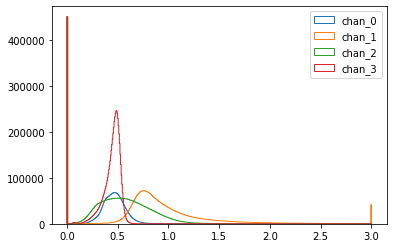

6
Analyze matrix: mmc_0255
shape before cropping: (420, 280, 280, 4)
new shape is: (186, 186, 186, 4)


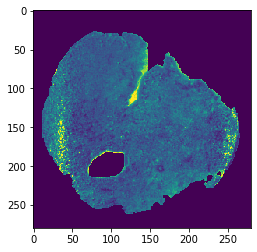

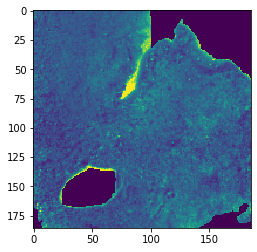

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.529352977019987
bit value: 22.361465681033156


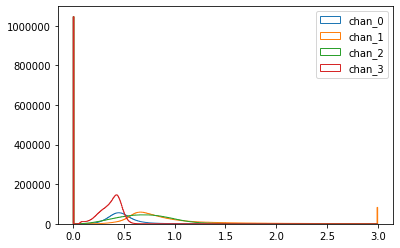

7
Analyze matrix: mmc_0084
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


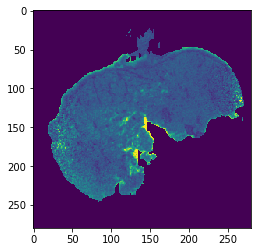

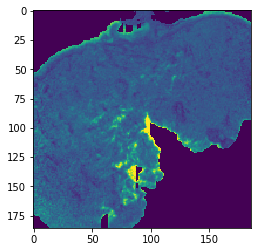

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.4772496283147875
bit value: 22.153146256250864


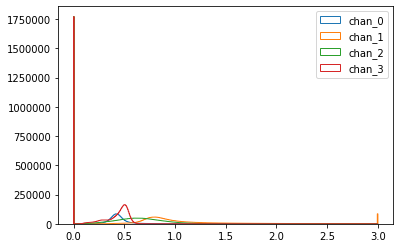

8
Analyze matrix: mmc_0129
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


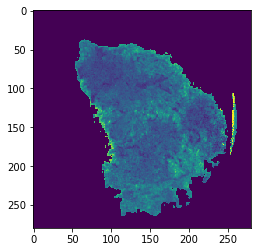

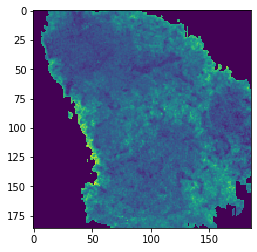

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.4244442738049233
bit value: 22.10141726621092


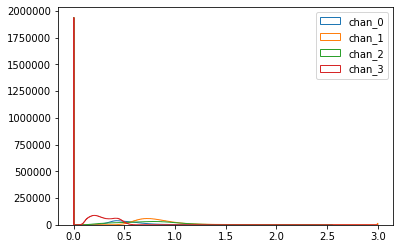

9
Analyze matrix: mmc_0123
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


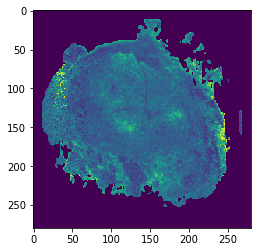

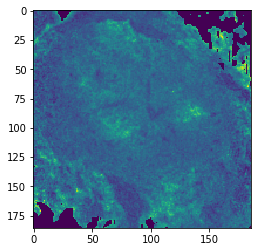

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.5268181076793864
bit value: 22.414856562184404


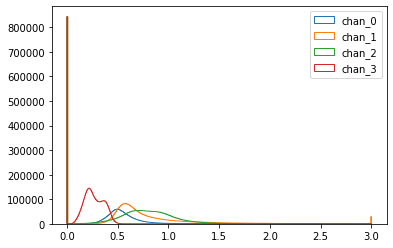

10
Analyze matrix: mmc_0086
shape before cropping: (380, 280, 280, 4)
new shape is: (186, 186, 186, 4)


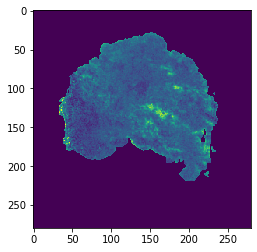

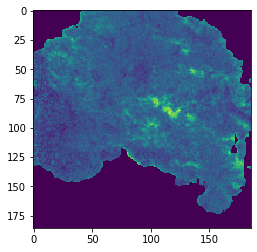

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.391894645214132
bit value: 22.004997748423886


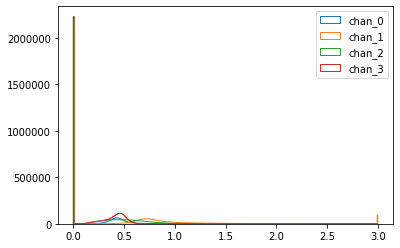

11
Analyze matrix: mmc_0228
shape before cropping: (420, 280, 280, 4)
new shape is: (186, 186, 186, 4)


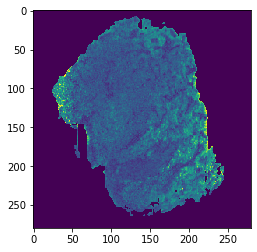

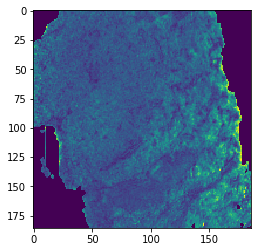

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.5544719693983424
bit value: 22.415693807751158


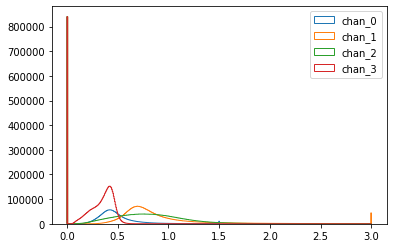

12
Analyze matrix: mmc_0128
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


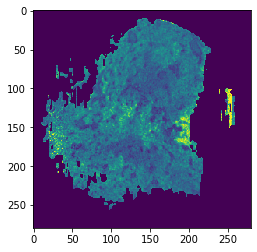

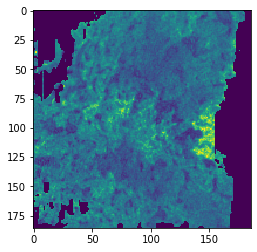

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.4640574661068367
bit value: 22.237703043502293


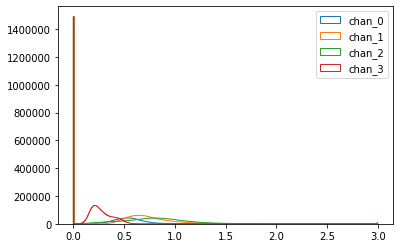

In [6]:
cropped_matrices = []

for fname, mat_to_analyze in zip(all_samples_names, all_samples):
    print(len(cropped_matrices))
    print("Analyze matrix:", fname)
    print("shape before cropping:", mat_to_analyze.shape)

    d = mat_to_analyze.shape[0]
    w = mat_to_analyze.shape[1]
    h = mat_to_analyze.shape[2]
    c = mat_to_analyze.shape[3]

    if w != h:
        print("Error: Width and height are not same size")
    if w != 280 or h != 280:
        print("ERROR: shapes of all samples in not the same")

    size_from_center = 93
    cube_mat = mat_to_analyze[int(d/2 - size_from_center):int(d/2 + size_from_center),
                              int(w/2 - size_from_center):int(w/2 + size_from_center),
                              int(h/2 - size_from_center):int(h/2 + size_from_center), :]


    print("new shape is:", cube_mat.shape)

    plt.imshow(mat_to_analyze[int(mat_to_analyze.shape[0]/2)-4, :,:,0])
    plt.imsave('emc0300_6d_T1W_slice90.png', mat_to_analyze[int(mat_to_analyze.shape[0]/2)-4, :,:,0])
    plt.show()
    plt.imshow(cube_mat[int(cube_mat.shape[0]/2+1)-4, :, :,0])
    plt.imsave('digBiopsy_emc0300_6d_T1W_slice90.png', cube_mat[int(cube_mat.shape[0]/2+1)-4, :, :,0])
    plt.show()

    # add matrix to list
    mat_to_analyze = cube_mat



    ## Clear Na's and get statistics
    clear_NA_and_get_stats(mat_to_analyze)



    for ch in range(mat_to_analyze.shape[-1]):
        plt.hist(mat_to_analyze[:,:,:,ch].ravel(), histtype='step', bins=512)

    plt.legend(['chan_' + str(i) for i in range(c)])
    plt.show()


    # add mat to list
    cropped_matrices.append(mat_to_analyze)
    

#transform the list to numpy  array
cropped_matrices = np.stack(cropped_matrices[:])


## Standarize data (Standard scaling on channels)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

fig, ax = plt.subplots(2, cropped_matrices.shape[-1], figsize=(20,6), sharey=True)

for i in range(cropped_matrices.shape[-1]):
    ax[0][i].hist(cropped_matrices[:,:,:,:,i].ravel(), bins=40)
    ax[0][i].set_title("channel {}, before scaling".format(i))

scaler = StandardScaler()
scaler.fit(cropped_matrices.reshape(-1, cropped_matrices.shape[-1]))
cropped_matrices = scaler.transform(cropped_matrices.reshape(-1, cropped_matrices.shape[-1])).reshape(cropped_matrices.shape)
with open("13_samlple_4ch_std_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

for i in range(cropped_matrices.shape[-1]):
    ax[1][i].hist(cropped_matrices[:,:,:,:,i].ravel(), bins=40)
    ax[1][i].set_title("channel {}, after scaling".format(i))

plt.tight_layout()
plt.show()

In [16]:
# save the data matrix in numpy object
np.save('/home/labs/neeman/Collaboration/Placenta_MRI_2021/data/raw_data_dropbox/4channels/13_samples_4ch_digbiopsy.npy', cropped_matrices)

(13, 186, 186, 186, 4)
14.955686239533993
-1.5386987157726089


## Load the all_samples_cropped file

In [41]:
cropped_matrices = np.load('/home/labs/neeman/Collaboration/Placenta_MRI_2021/data/raw_data_dropbox/4channels/13_samples_4ch.npy')